In [5]:
from colormath.color_objects import LabColor, XYZColor, sRGBColor, HSLColor, AdobeRGBColor
from colormath.color_conversions import convert_color
from colr import Colr as C
import random as r

# THIS NOTEBOOK A SECOND ATTEMPT AT COLOR
# DEVELOPING HEURISTICS USING HSL THANKS TO https://www.slynyrd.com/blog/2018/1/10/pixelblog-1-color-palettes
# THOUGHTS ON HSB COLOR RAMPS!

def rgb_to_hsl(a, b, c):
    rgb = sRGBColor(a, b, c, is_upscaled=True)
    hsl = convert_color(rgb, HSLColor)
    return hsl.get_value_tuple()
    
def hsl_to_rgb(a, b, c):
    hsl = HSLColor(a, b, c)
    rgb = convert_color(hsl, sRGBColor).get_value_tuple()
    
    return [rgb[0] * 255, rgb[1]*255, rgb[2]*255]

def print_combo(fg, bg):
    for i in range(0,3):
        if fg[i] > 255:
            fg[i] = 255
        if bg[i] > 255:
            bg[i]= 255
    print(C().b_rgb(bg[0], bg[1], bg[2]) .rgb(fg[0], fg[1], fg[2], 'Lorem ipsum.'))

def bound(min_val, max_val, val):
    new_val = val
    if (val > max_val):
         new_val = max_val
    elif (val < min_val):
        new_val = min_val
    return new_val

# LAB FUNCTIONS
def generate_analogous(feature):
    return bound(-128, 128, feature + r.uniform(-10, 10))

def generate_contrast(feature):
    return bound(-128, 128, feature + r.uniform(-100, 100))

def average_color(c1, c2):
    avg = []
    for i in range(0,3):
        avg.append((c1[i] + c2[i])/ 2)
    return avg

# verifies that the conversions work
print(print_combo([192, 87, 70], [192, 87, 70]))
hsl = rgb_to_hsl(192, 87, 70)
print("hsl", hsl)
rgb = hsl_to_rgb(hsl[0], hsl[1], hsl[2])
print("back to rgb", rgb)

Lorem ipsum.
None
hsl (8.360655737704917, 0.49193548387096764, 0.5137254901960784)
back to rgb [191.99999999999994, 87.00000000000001, 70.00000000000003]


In [10]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()

# input: an array of RGB values representing colors that someone likes
# gmm is done in the HSL space and outputs HSL
def get_samples(inputs, num_samples, if_print_inputs):
    lab_likes = []
    print("----inputs----")
    
    for color in inputs:
        if if_print_inputs: print_combo(color, color)
        lab_likes.append(rgb_to_hsl(color[0], color[1], color[2]))
    lab_likes = np.reshape(lab_likes, (-1, 3))
    gmm = GaussianMixture(n_components=2).fit(lab_likes)
    labels = gmm.predict(lab_likes)
    plot_gmm(gmm, lab_likes);  # plots the clustering!

    samples = gmm.sample(num_samples)[0]
    return samples

# input: array of hsl samples directly taken from the gmm and converts them
# into rgb and prints them!
def print_samples(samples):
    print("----samples----")
    for color in samples:
        rgb = hsl_to_rgb(color[0], color[1], color[2])
        print_combo(rgb,rgb)
        
# input: of samples generated from gmm, in HSL
# output: color palettes
def generate_stepping_palettes(samples, steps):
    print("--")
    for color in samples:
        stepping_wheel(color, steps)
        print("--")
        

# input: generated palettes, in HSL tuples
def print_palettes(generated):
    for palette in generated:
        rgb1 = hsl_to_rgb(palette[0][0], palette[0][1], palette[0][2])
        rgb2 = hsl_to_rgb(palette[1][0], palette[2][1], palette[3][2])
        print_combo(rgb1, rgb2)

# given a color in hsl, does a stepping algorithm
# Current issues: need to step better, when hits max, doesn't wrap over,
# doesn't work well with dark inputs, it's a uniform increment (lol)
def stepping_wheel(color, steps):
    rgb = hsl_to_rgb(color[0], color[1], color[2])
    print_combo(rgb, rgb)
        
    # 0 = hue, 1 = saturation, 2 = lightness.
    for i in range(0, steps):
        color[0] += 20 # hue
        
        if color[0] > 360: # wraps around if it's at red
            color[0] = r.uniform(0, 20)
            
        # I shouldn'thave to do this instead, we should generate
        # in steps depending on how close we are to 100. The closer, the more
        # gradual the increase.
        if color[1] > 100:
            color[1] = r.uniform(.7, .8)
            
        if i < steps/2:
            color[1] -= .20
            color[2] -= .0
        else:
            color[1] += .15
            color[2] -= .2
        
        color[0] = bound(0, 360, color[0])
        color[1] = bound(0, 1, color[1])
        color[2] = bound(0,1, color[2])
        rgb = hsl_to_rgb(color[0], color[1], color[2])
        print_combo(rgb, rgb)
        

----inputs----
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
Lorem ipsum.
--
Lorem i

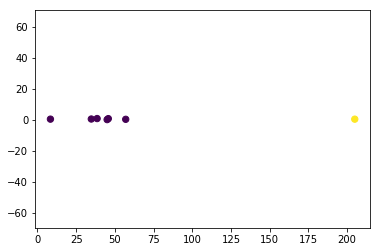

In [13]:

# a list of colors we like in rgb, pastels
pastel = [ [255, 228, 171], [255, 171, 209], [144, 240, 155], [245, 118, 130], [250, 178, 162], [145, 255, 187], [203, 240, 168]]

# a list of earth tones
earth = [ [192, 87, 70], [240, 207, 101], [73, 67, 49], [89, 152, 197], [222, 185, 134], [208, 205, 148], [247, 208, 138]]

wack = [ [246,71,64], [248,221,164], [191, 219, 247], [60, 187, 177], [87, 226, 229], [241, 113, 5], [106, 16, 242]]


# stepping_wheel([247, .91, .61, ], 5)
samples = get_samples(earth, num_samples=30, if_print_inputs=True)
# print_samples(samples)
generate_stepping_palettes(samples, steps=4)


